<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/10_3_Mnist_Xavier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-10-3-mnist_nn_xavier.py

In [1]:
# Lab 10 MNIST and NN
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
# Glorot normal initializer, also called Xavier normal initializer.
# see https://www.tensorflow.org/api_docs/python/tf/initializers
# weight값 초기값을 위해 사용하므로  kernel_initializer에 설정한다
# 따라서 train테이터를 보면 초기 cost가 다른 경우에 비해 낮게 나타난다
tf.model.add(tf.keras.layers.Dense(input_dim=784, units=256, kernel_initializer='glorot_normal', activation='relu')) # xavier는  tensorflow2에서 glorot_normal로 변경되었다,
tf.model.add(tf.keras.layers.Dense(units=256, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()


11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
history = tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

Epoch 1/15
600/600 [==============================] - 5s 7ms/step - loss: 2.0035 - accuracy: 0.8952
Epoch 2/15
600/600 [==============================] - 3s 6ms/step - loss: 0.3963 - accuracy: 0.9445
Epoch 3/15
600/600 [==============================] - 3s 6ms/step - loss: 0.2348 - accuracy: 0.9584
Epoch 4/15
600/600 [==============================] - 7s 11ms/step - loss: 0.1747 - accuracy: 0.9666
Epoch 5/15
600/600 [==============================] - 6s 10ms/step - loss: 0.1486 - accuracy: 0.9693
Epoch 6/15
600/600 [==============================] - 6s 11ms/step - loss: 0.1341 - accuracy: 0.9715
Epoch 7/15
600/600 [==============================] - 3s 5ms/step - loss: 0.1077 - accuracy: 0.9752
Epoch 8/15
600/600 [==============================] - 3s 5ms/step - loss: 0.0939 - accuracy: 0.9779
Epoch 9/15
600/600 [==============================] - 4s 7ms/step - loss: 0.0849 - accuracy: 0.9791
Epoch 10/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0788 - accuracy: 0.9

313/313 [==============================] - 1s 3ms/step


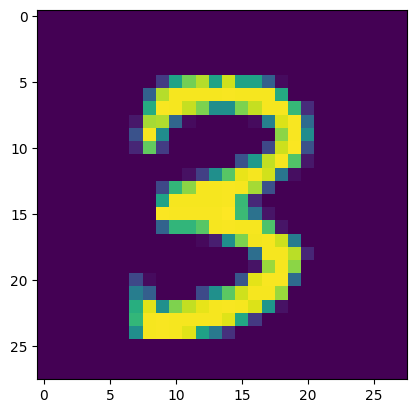

index:  9429 actual y:  3 predicted y:  3


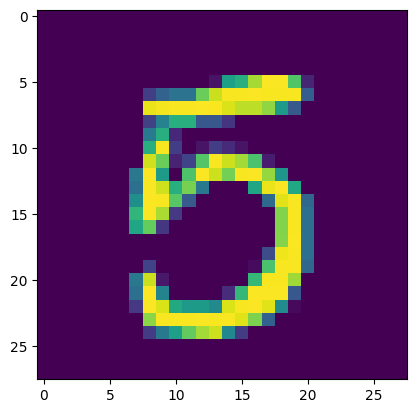

index:  4420 actual y:  5 predicted y:  5


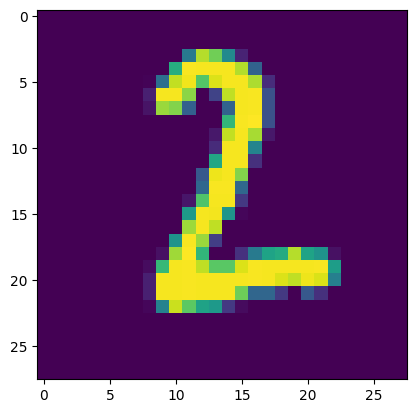

index:  5507 actual y:  2 predicted y:  2


In [4]:
import matplotlib.pyplot as plt

y_predicted = tf.model.predict(x_test)
for x in range(0, 3):
    random_index = random.randint(0, x_test.shape[0]-1)
    plt.imshow(x_test2[random_index]), plt.show()

    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))



In [5]:
# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1715 - accuracy: 0.9688
loss:  0.17151692509651184
accuracy 0.9688000082969666
